In [481]:
import requests
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import linregress
from scipy.stats import pearsonr
from scipy.stats import zscore
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [233]:
df_red = pd.read_csv('winequality-red .csv', sep  = ';')
df_white = pd.read_csv('winequality-white.csv', sep = ';')

In [234]:
df_red.head()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4  0.70 0.00 1.9 0.076 11.0 34.0 0.9978 3.51 0.56 9.4                                                  5                                                                                                                      
7.8  0.88 0.00 2.6 0.098 25.0 67.0 0.9968 3.20 0.68 9.8                                                  5                                                                                                                      
     0.76 0.04 2.3 0.092 15.0 54.0 0.9970 3.26 0.65 9.8                                                  5                                                                                                                      
11.2 0.28 0.56 1.9 0.075 17.0 60.0 0.9980 3.16 0.58 9.8                                                  6                                                                                                                      
7.4  0.70 0.00 1.9 0.076 11.0 34.0 0.9978 3.51 0.56 9.4                                                  5

## Fixing DF Columns

In [235]:
df_red.reset_index(inplace = True)
df_white.reset_index(inplace = True)

In [236]:
df_red.head()

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [238]:
df_red.rename(columns = {'level_0': 'fixed_acidity',
                         'level_1':'volatile_acidity',
                         'level_2': 'citric_acid',
                         'level_3': 'residual_sugar', 
                         'level_4':'chlorides',
                         'level_5':'free_sulferdioxide',
                         'level_6':'total_sulfurdioxide',
                         'level_7':'density',
                         'level_8':'ph',
                         'level_9':'sulphates',
                         'level_10':'alcohol'}, inplace = True)

In [239]:
df_red.rename(columns = {'fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"': 'quality' }
              , inplace = True)

In [240]:
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulferdioxide,total_sulfurdioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [241]:
df_white.reset_index(inplace = True)

In [242]:
df_white.rename(columns = {'level_0': 'fixed_acidity',
                         'level_1':'volatile_acidity',
                         'level_2': 'citric_acid',
                         'level_3': 'residual_sugar', 
                         'level_4':'chlorides',
                         'level_5':'free_sulferdioxide',
                         'level_6':'total_sulfurdioxide',
                         'level_7':'density',
                         'level_8':'ph',
                         'level_9':'sulphates',
                         'level_10':'alcohol'}, inplace = True)

In [243]:
df_white.rename(columns = {'fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"': 'quality' }
              , inplace = True)

In [249]:
df_white= df_white.drop(columns = 'index')

In [250]:
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulferdioxide,total_sulfurdioxide,density,ph,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2


In [251]:
#import concat master csv

In [469]:
wine_df = pd.read_csv('wine_df_dummies.csv')

In [473]:
df = wine_df.drop(columns= 'Unnamed: 0',inplace = True)

In [474]:
df = wine_df

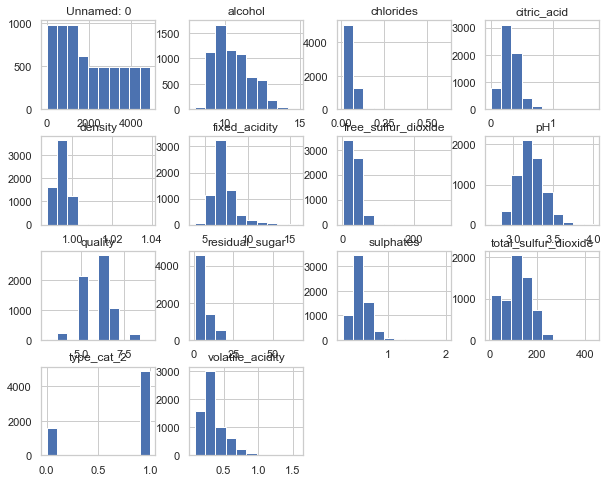

In [418]:
wine_df.hist(figsize = (10,8))
plt.show()

In [395]:
df_red['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

## Intial Fit Test

In [475]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_cat_2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [402]:
p

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'type_cat_2']

In [464]:
#independent predictors, and target dependent variable
#including all variables
p = list(df.columns)

In [476]:
p = ['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'type_cat_2']
target = 'quality'

In [478]:
train, test = train_test_split(df)

In [479]:
predictors = '+'.join(p)
f = target + '~' + predictors
model = ols(formula=f, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     55.63
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          3.20e-112
Time:                        11:02:10   Log-Likelihood:                -1799.5
No. Observations:                1625   AIC:                             3625.
Df Residuals:                    1612   BIC:                             3695.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              105.9020     31.096      3.406      0.001      44.909     166.895
fixed_acidity            0.0733      0.033      2.253      0.024       0.009       0.137
volatile_acidity        -1.6241      0.155    -10.510      0.000      -1.927      -1.321
citric_acid             -0.0858      0.152     -0.564      0.573      -0.384       0.212
residual_sugar           0.0634      0.013      5.071      0.000       0.039       0.088
chlorides               -0.6566      0.605     -1.085      0.278      -1.844       0.530
free_sulfur_dioxide      0.0002      0.001      0.140      0.888      -0.003       0.003
total_sulfur_dioxide    -0.0003      0.001     -0.521      0.602      -0.002       0.001
density               -103.5808     31.501     -3.288      0.001    -165.368     -41.794
pH                       0.1279      0.182      0.703      0.482      -0.229       0.485
sulphates                0.5135      0.153      3.361      0.001       0.214       0.813
alcohol                  0.2295      0.039      5.854      0.000       0.153       0.306
type_cat_2              -0.4904      0.122     -4.006      0.000      -0.731      -0.250
==============================================================================
Omnibus:                       33.116   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.720
Skew:                          -0.062   Prob(JB):                     5.36e-15
Kurtosis:                       3.977   Cond. No.                     3.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [226]:
def regression(x, y, color):
    reg = linregress(x, y)
    corr, _ = pearsonr(x, y)
    if corr > 0:
        print('Positive correlation')
    elif corr < 0:
        print('Negative correlation')
    else:
        print('No correlation')
    print('Pearsons correlation: %.3f' % corr)
    print(reg)
    sns.regplot(x, y, color=color)

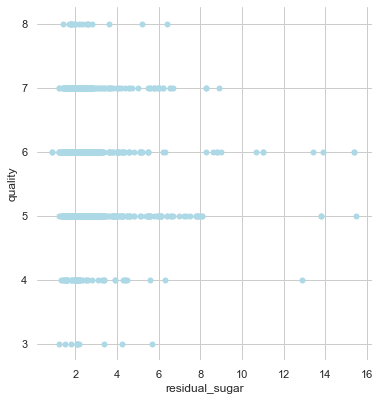

In [124]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x= df_red['residual_sugar'], y = df_red['quality'],
                sizes=(1, 8), linewidth=0,
                 ax=ax, color = 'lightblue', label = '')


# sns.scatterplot(x= df['S&P'], y = df['date'],
#                 sizes=(1, 8), linewidth=0,
#                  ax=ax, color = 'lightblue', label = '')
plt.show()

In [ ]:
#try z-scoring data
#create polynomials // exponentiate all values 

In [406]:
def log_transform(full_df):
    """Performs log transformation of a dataframes columns. If columns value is equal to 0, 0.001 will be logged instead."""
    logged = []
    for column in df.columns:
        logged.append(df[f'{column}'].transform(lambda x: np.log(x) if x !=0 else np.log(0.001)))
    logged_df = pd.DataFrame(logged)
    return logged_df.transpose()
        

In [407]:
def log_column(df_column):
    """Performs log transformation of a dataframe column. If column value is equal to 0, 0.001 will be logged instead."""
    transformed = df_column.transform(lambda x: np.log(x) if x !=0 else np.log(0.001))
    results = pd.DataFrame(transformed)
    return results

In [368]:
for column in df.columns:
    logged = log_column(df[f'{column}'])
 

In [456]:
df_no_dummy = df.drop(columns = ['type_cat_2', 'total_sulfur_dioxide'], inplace = True)

KeyError: "['type_cat_2'] not found in axis"

In [423]:
df_logged = log_transform(df_no_dummy)

In [424]:
df_logged.corr()

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Unnamed: 0,1.000000,-0.294837,-0.289755,0.130215,0.143023,-0.339495,0.265914,-0.286590,-0.186579,-0.218050,0.190674,0.095292
fixed_acidity,-0.294837,1.000000,0.220265,0.167277,-0.077494,0.378671,-0.375784,0.466049,-0.272536,0.276538,-0.110539,-0.086053
volatile_acidity,-0.289755,0.220265,1.000000,-0.433985,-0.120442,0.437534,-0.437219,0.267171,0.219353,0.238633,-0.024493,-0.268626
citric_acid,0.130215,0.167277,-0.433985,1.000000,0.159321,-0.163556,0.325654,-0.017575,-0.345511,-0.063066,-0.000821,0.130420
residual_sugar,0.143023,-0.077494,-0.120442,0.159321,1.000000,-0.101634,0.412330,0.511003,-0.245606,-0.168474,-0.321922,-0.007893
chlorides,-0.339495,0.378671,0.437534,-0.163556,-0.101634,1.000000,-0.399808,0.521127,0.122886,0.390550,-0.368566,-0.258594
total_sulfur_dioxide,0.265914,-0.375784,-0.437219,0.325654,0.412330,-0.399808,1.000000,-0.106308,-0.250385,-0.320427,-0.187699,0.013575
density,-0.286590,0.466049,0.267171,-0.017575,0.511003,0.521127,-0.106308,1.000000,0.011186,0.278396,-0.689477,-0.293245
pH,-0.186579,-0.272536,0.219353,-0.345511,-0.245606,0.122886,-0.250385,0.011186,1.000000,0.229721,0.128514,0.016896
sulphates,-0.218050,0.276538,0.238633,-0.063066,-0.168474,0.390550,-0.320427,0.278396,0.229721,1.000000,-0.018680,0.031728


Positive correlation
Pearsons correlation: 0.444
LinregressResult(slope=0.3253120380535122, intercept=2.4052686015566556, rvalue=0.4443185200076541, pvalue=0.0, stderr=0.008138804046830424)


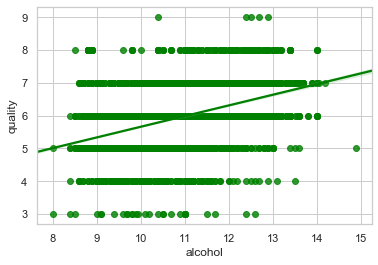

In [323]:
regression(df['alcohol'],df['quality'], 'green')

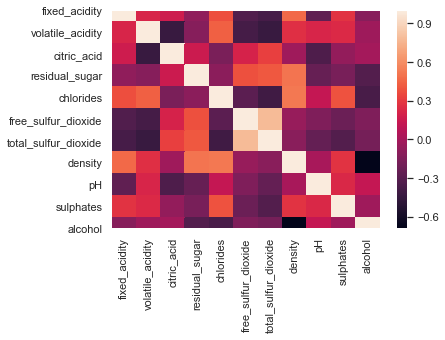

In [386]:
sns.heatmap(df_logged.corr())

In [387]:
#df_logged = df_logged.drop(columns = 'free_sulfur_dioxide', inplace = True)

In [425]:
df_logged.head()

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-6.907755,2.001480,-0.356675,-6.907755,0.641854,-2.577022,3.526361,-0.002202,1.255616,-0.579818,2.240710,1.609438
1,0.000000,2.054124,-0.127833,-6.907755,0.955511,-2.322788,4.204693,-0.003205,1.163151,-0.385662,2.282382,1.609438
2,0.693147,2.054124,-0.274437,-3.218876,0.832909,-2.385967,3.988984,-0.003005,1.181727,-0.430783,2.282382,1.609438
3,1.098612,2.415914,-1.272966,-0.579818,0.641854,-2.590267,4.094345,-0.002002,1.150572,-0.544727,2.282382,1.791759
4,1.386294,2.001480,-0.356675,-6.907755,0.641854,-2.577022,3.526361,-0.002202,1.255616,-0.579818,2.240710,1.609438


In [455]:
#independent predictors, and target dependent variable
#removing free_sulfur_dioxide because of multicollinearity
p = ['fixed_acidity','volatile_acidity','citric_acid', 'residual_sugar','chlorides',
 'free_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']
target = 'quality'

In [429]:
predictors = '+'.join(p)
f = target + '~' + predictors
model = ols(formula=f, data=df_logged).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     246.6
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:03:57   Log-Likelihood:                 4029.9
No. Observations:                6497   AIC:                            -8038.
Df Residuals:                    6486   BIC:                            -7963.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1877      0.081      2.311      0.021       0.028       0.347
fixed_acidity            0.0324      0.018      1.812      0.070      -0.003       0.067
volatile_acidity        -0.0948      0.005    -19.978      0.000      -0.104      -0.085
citric_acid              0.0027      0.002      1.391      0.164      -0.001       0.006
residual_sugar           0.0356      0.004      9.462      0.000       0.028       0.043
chlorides               -0.0056      0.005     -1.043      0.297      -0.016       0.005
total_sulfur_dioxide    -0.0154      0.003     -4.680      0.000      -0.022      -0.009
density                 -5.4672      1.691     -3.234      0.001      -8.781      -2.153
pH                       0.1436      0.046      3.120      0.002       0.053       0.234
sulphates                0.0783      0.008     10.411      0.000       0.064       0.093
alcohol                  0.5340      0.028     18.784      0.000       0.478       0.590
==============================================================================
Omnibus:                      740.685   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1961.653
Skew:                          -0.641   Prob(JB):                         0.00
Kurtosis:                       5.367   Cond. No.                     7.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [430]:
sns.residplot(p, target, data = df_logged, color="g")

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 10 and the array at index 1 has size 6497

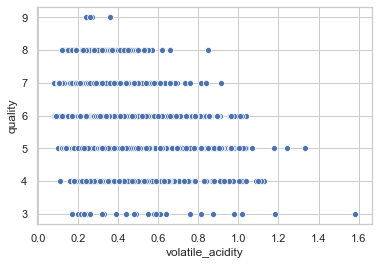

In [339]:
sns.scatterplot(df['volatile_acidity'], df['quality'])
#sns.scatterplot(df['citric_acid'], df['quality'], color = 'green')
plt.show()

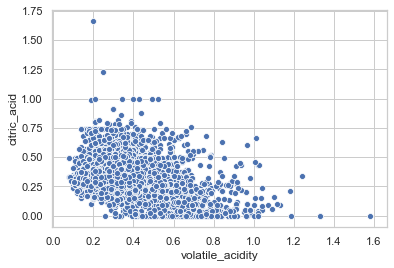

In [491]:
sns.scatterplot(df['volatile_acidity'], df['citric_acid'])

In [433]:
sns.pairplot(df['volatile_acidity'], df['quality'])

TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

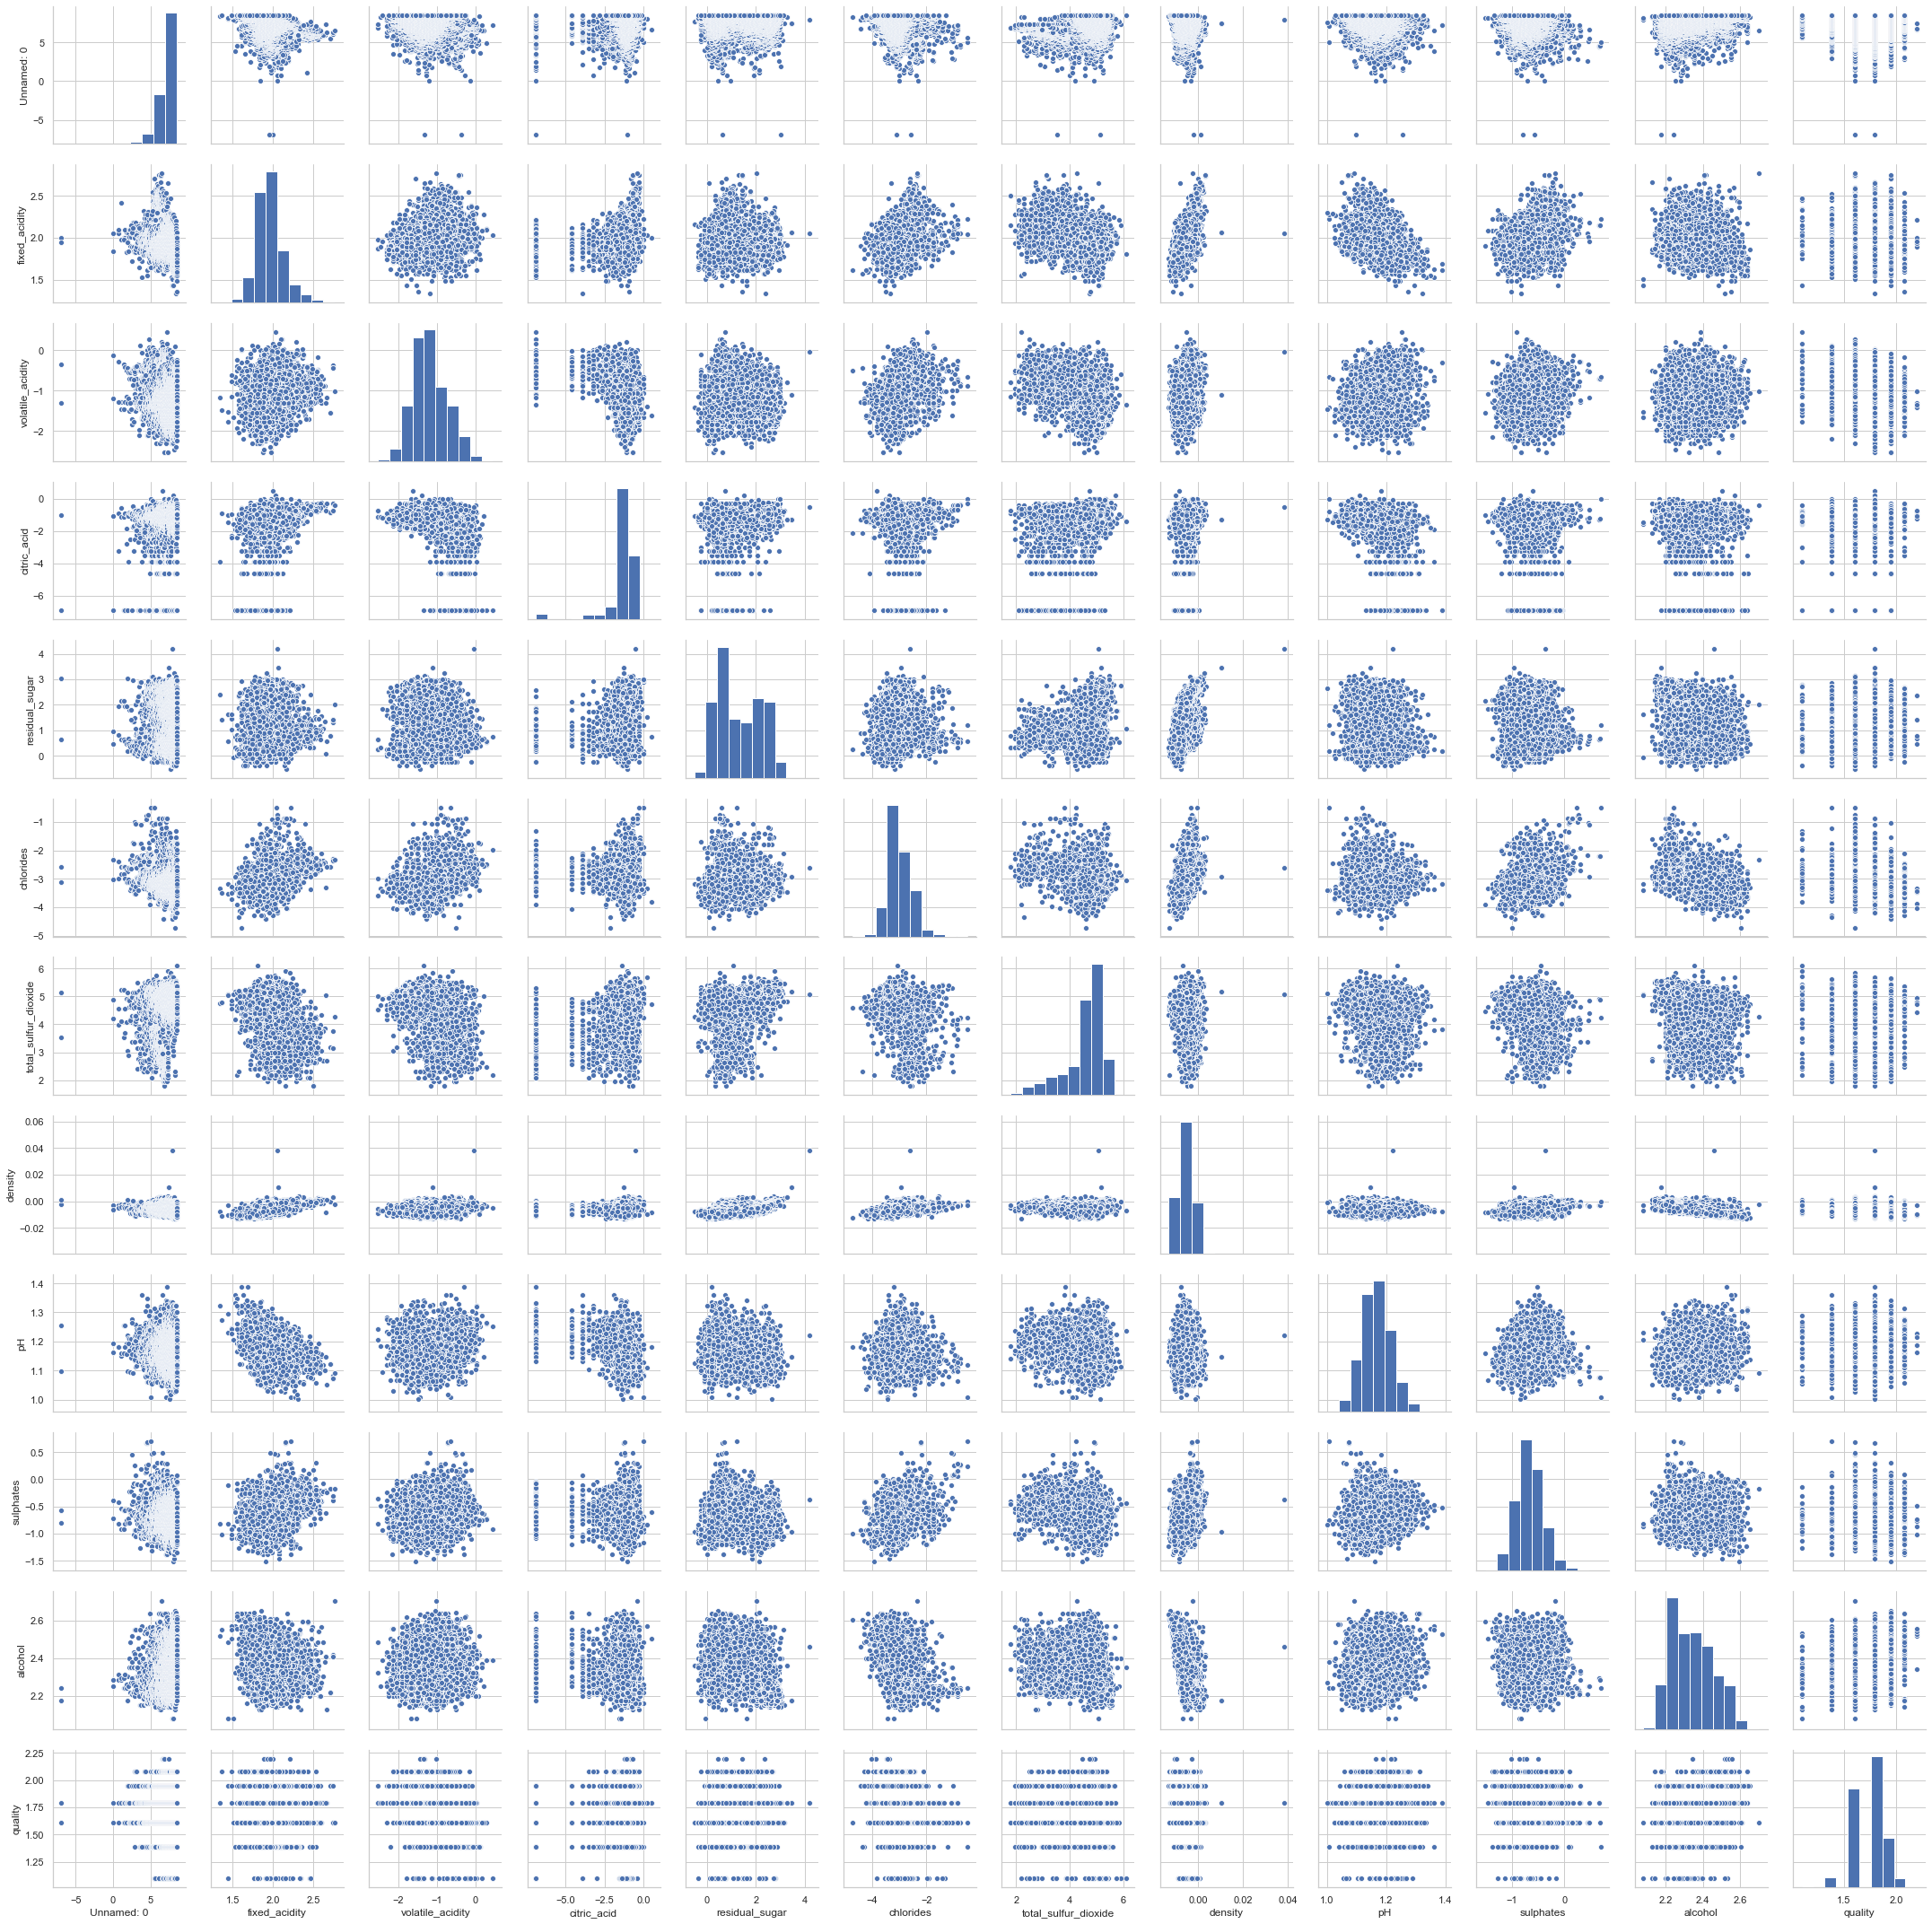

In [490]:
sns.pairplot(df_logged)

In [439]:
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
poly_logged_df = poly.fit_transform(df_logged)

In [438]:
poly

PolynomialFeatures(degree=2, include_bias=False, interaction_only=True,
                   order='C')

In [441]:
poly_log_df = pd.DataFrame(poly_logged_df)

In [453]:
poly_log_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,-6.907755,2.001480,-0.356675,-6.907755,0.641854,-2.577022,3.526361,-0.002202,1.255616,-0.579818,...,-0.002765,0.001277,-0.004935,-0.003545,-0.728029,2.813471,2.020836,-1.299205,-0.933182,3.606283
1,0.000000,2.054124,-0.127833,-6.907755,0.955511,-2.322788,4.204693,-0.003205,1.163151,-0.385662,...,-0.003728,0.001236,-0.007315,-0.005158,-0.448584,2.654755,1.872019,-0.880229,-0.620700,3.673353


In [452]:
poly_log_df.rename(columns = poly.get_feature_names())

TypeError: 'list' object is not callable

In [486]:
len(poly.get_feature_names())

78

In [484]:
clf = linear_model.LinearRegression()
clf.fit(p, target)

ValueError: Expected 2D array, got 1D array instead:
array=['fixed_acidity' 'volatile_acidity' 'citric_acid' 'residual_sugar'
 'chlorides' 'free_sulfur_dioxide' 'total_sulfur_dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'type_cat_2'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.